# [Lab Session 3](fourier.ipynb)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


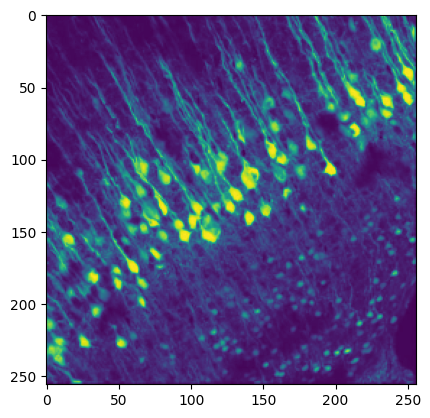

In [10]:
cell_img = plt.imread('data/cells.png')
cell_img = resize(cell_img,(256,256))
plt.imshow(cell_img)

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [ ]:
cell_ft = np.fft.fft2(cell_img) #should result in a complex array (2D input)
#calculates the discrete FOurir transform
cell_ft.dtype

dtype('complex128')

**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [ ]:
#access the real part 𝑎 by .real 
# acess the imaginary part 𝑏 by (j NOT i)
#zum interpretieren in der Fourir Dimension -> amplitude und phase un polar form anschauen
amplitude = np.abs(cell_ft)       
phase = np.angle(cell_ft)

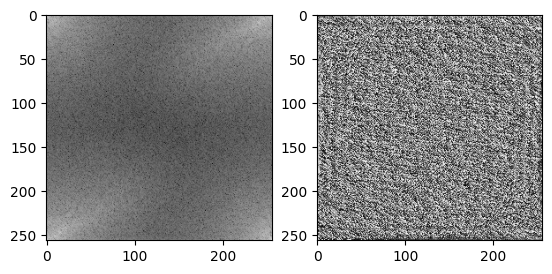

In [ ]:
#nebeneinander zeigen 
plt.figure()
plt.subplot(1, 2, 1)    #positions i (total number rows),ii (total number of columns),iii (welcher graph geaccessed werden soll)
plt.imshow(np.log(amplitude), 'gray')      #amplitude hat seehr viel verschiedene Werte -> log-scale
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

#result ist einfach jedes Pixel an seiner Position transformiert
#-> nicht geordnet

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


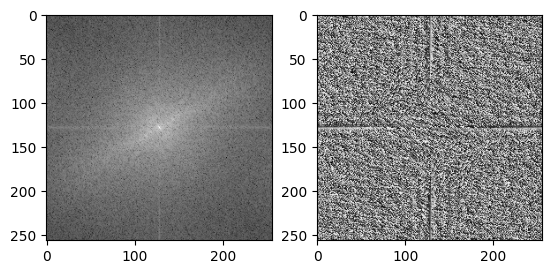

In [ ]:
#irgendwie auf 0 geshifted
cell_0_centered = np.fft.fftshift(cell_ft)
amplitude_0 = np.abs(cell_0_centered)       
phase_0 = np.angle(cell_0_centered)

plt.figure()
plt.subplot(1, 2, 1)    #positions i (total number rows),ii (total number of columns),iii (welcher graph geaccessed werden soll)
plt.imshow(np.log(amplitude_0), 'gray')      #amplitude hat seehr viel verschiedene Werte -> log-scale
plt.subplot(1, 2, 2)
plt.imshow(phase_0, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


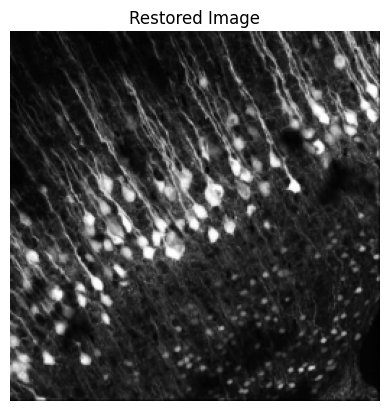

In [46]:
#wollen BIld wieder zurückbekommen
cell_inverse_0 = np.fft.ifftshift(cell_0_centered)     #shift in die Mitte rückgängig machen
cell_restore = np.fft.ifft2(cell_inverse_0)            # invers Fourir transform anwenden
restored_image_real = np.real(cell_restore)
plt.imshow(restored_image_real, cmap='gray')
plt.title('Restored Image')
plt.axis('off')
plt.show()                                             #man bekommt wieder das gleiche raus


---


**[Task 2 (a).]()** Load the brain CT image.


In [54]:
ct_img = plt.imread("data/brain_ct.png")

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


In [62]:
ct_ft = np.fft.fft2(ct_img)
ct_0_centered = np.fft.fftshift(ct_ft)
ct_amplitude_0 = np.abs(ct_0_centered)       
ct_phase_0 = np.angle(ct_0_centered)

In [63]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


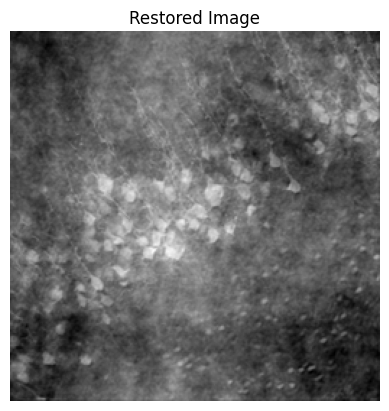

In [77]:
#convert amplitude & phase to a cartesian complex array 
# !!! BEIDE entweder centered oder nicht
merged_ct_cell_1 = to_complex_array(ct_amplitude_0, phase_0)
merged_1_inverse_0 = np.fft.ifftshift(merged_ct_cell_1)     #shift in die Mitte rückgängig machen
merged_1_restore = np.fft.ifft2(merged_1_inverse_0)         #Fourir Transform rückgängig
restored_merged_real = np.real(merged_1_restore)            #nur die realen Zahlen rausnehmen -> hatte vorher auch nur die
plt.imshow(restored_merged_real, cmap='gray')               #darstellen in grayscale,...
plt.title('Restored Image')
plt.axis('off')
plt.show()    


**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


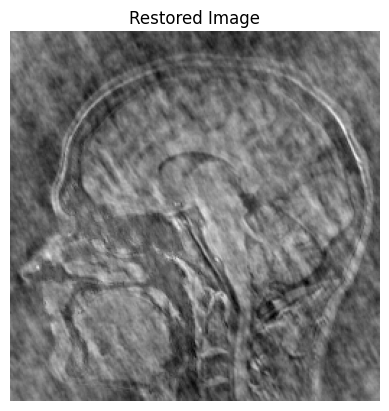

In [84]:
#convert amplitude & phase to a cartesian complex array 
# !!! BEIDE entweder centered oder nicht
merged_ct_cell_2 = to_complex_array(amplitude_0, ct_phase_0)
merged_2_inverse_0 = np.fft.ifftshift(merged_ct_cell_2)     #shift in die Mitte rückgängig machen
merged_2_restore = np.fft.ifft2(merged_2_inverse_0)         #Fourir Transform rückgängig
restored_merged_real = np.real(merged_2_restore)            #nur die realen Zahlen rausnehmen -> hatte vorher auch nur die
plt.imshow(restored_merged_real, cmap='gray')               #darstellen in grayscale,...
plt.title('Restored Image')
plt.axis('off')
plt.show()    

-> PHASE hat mehr Information!!!!

---


**[Task 3 (a).]()** Create a lowpass filter mask.


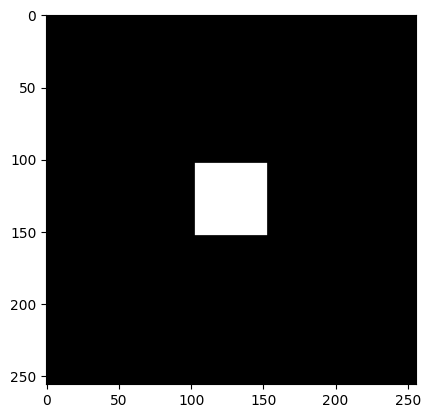

/tmp/ipykernel_26782/2564607179.py:15: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(low_pass_ct), cmap='gray')


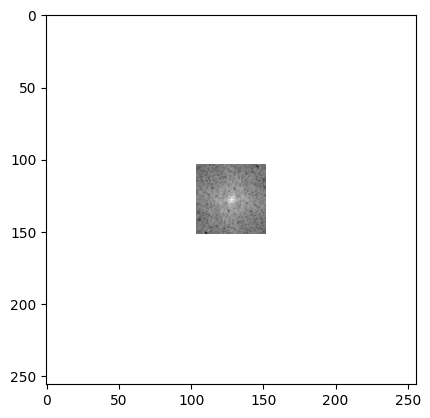

In [142]:
filter_window_size = 50
input_size = 256

mask = np.zeros((input_size, input_size))     #array of the same shape as the image, filled with zeros
filter_height, filter_width = filter_window_size, filter_window_size       #filtergröße festlegen
center_y, center_x = mask.shape[0] // 2, mask.shape[1] // 2           #center Pixel festlegen
mask[center_y - filter_height // 2 : center_y + filter_height // 2, 
     center_x - filter_width // 2 : center_x + filter_width // 2] = 1 
#die mitte festlegen -> von Centre-Pixel aus in alle Richtungen filter_height//2 gehen

plt.imshow(mask, cmap='gray')
plt.show()

low_pass_ct = mask * ct_amplitude_0
plt.imshow(np.log(low_pass_ct), cmap='gray')
plt.show()


**[Task 3 (b).]()** Create a highpass filter maks.


/tmp/ipykernel_26782/4195707040.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(high_pass_ct), cmap='gray')


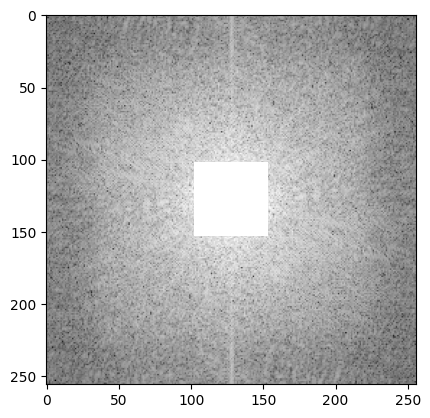

In [134]:
high_pass_ct = (1-mask) * ct_amplitude_0
plt.imshow(np.log(high_pass_ct), cmap='gray')
plt.show()

**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


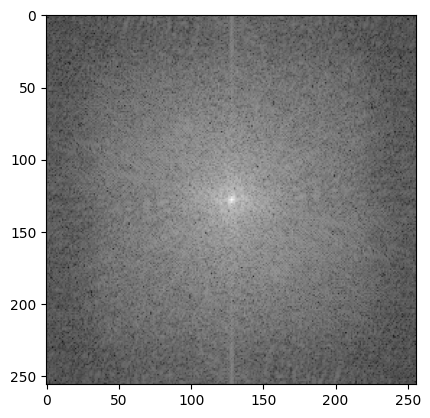

/tmp/ipykernel_26782/3864648033.py:7: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(low_pass_ct), cmap='gray')


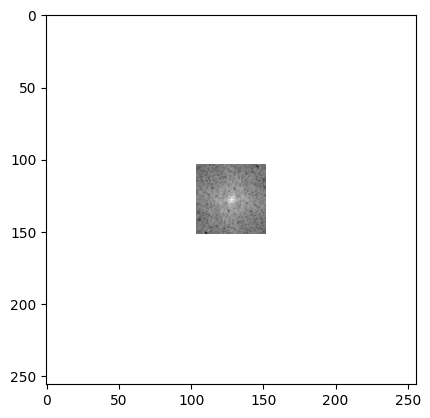

/tmp/ipykernel_26782/3864648033.py:12: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(high_pass_ct), cmap='gray')


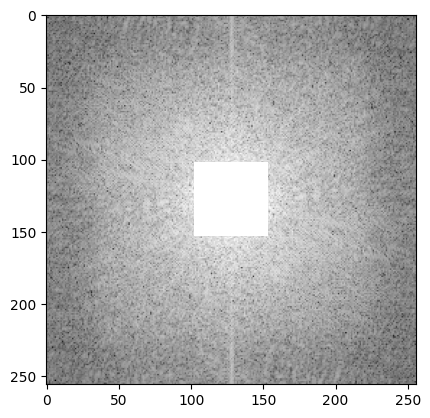

In [140]:
#CT amplitude so anzeigen
plt.imshow(np.log(ct_amplitude_0), cmap='gray')
plt.show()

#low pass gefiltert anzeigen
low_pass_ct = mask * ct_amplitude_0
plt.imshow(np.log(low_pass_ct), cmap='gray')
plt.show()

#high pass gefiltert anzeigen
high_pass_ct = (1-mask) * ct_amplitude_0
plt.imshow(np.log(high_pass_ct), cmap='gray')
plt.show()

**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


In [ ]:
#low pass filteres: 
low_pass_ct = mask * ct_amplitude_0
#mergen low gepasste amplitude & ct phase normal
merged_ct_lp = to_complex_array(low_pass_ct, ct_phase_0)
#shift reversen
merged_inverse_0 = np.fft.ifftshift(merged_ct_lp)    
#Fourir Transform rückgängig, apply IFFT
merged_2_restore = np.fft.ifft2(merged_2_inverse_0)      
#nur die realen Zahlen   
restored_merged_real = np.real(merged_2_restore)           
 #darstellen in grayscale
plt.imshow(restored_merged_real, cmap='gray')          
plt.title('Restored Image')
plt.axis('off')
plt.show()    

---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


Due to high computational costs, we need to resize the image.


In [141]:
test_img = resize(brain_img, (40, 40))
plt.imshow(test_img, 'gray')

NameError: name 'brain_img' is not defined

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


**[Task 4 (f).]()** Round the arrays and compare them again.


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)
